In [133]:
# Enable autoreload for development
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
# Setup
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [135]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [136]:
# Load and clean data
from src.load_data import load_data
from src.clean_data import clean_dataset, add_features

In [137]:
df = load_data()
df_clean = clean_dataset(df)
df_clean = add_features(df_clean)  # 👈 Feature Engineering

In [138]:
# Confirm all required columns exist
print("Cleaned Columns:", df_clean.columns.tolist())

Cleaned Columns: ['no.', 'diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'thrust_force_(n)', 'torque_(nm)', 'flank_wear_(mm)', 'workpiece', 'speed_per_dia', 'log_feed', 'torque_feed_ratio', 'material_hardness', 'feed_squared', 'speed_squared']


In [139]:
# Features and targets
X = df_clean[['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'speed_per_dia', 'log_feed']]
y = df_clean[['thrust_force_(n)', 'torque_(nm)', 'flank_wear_(mm)']]

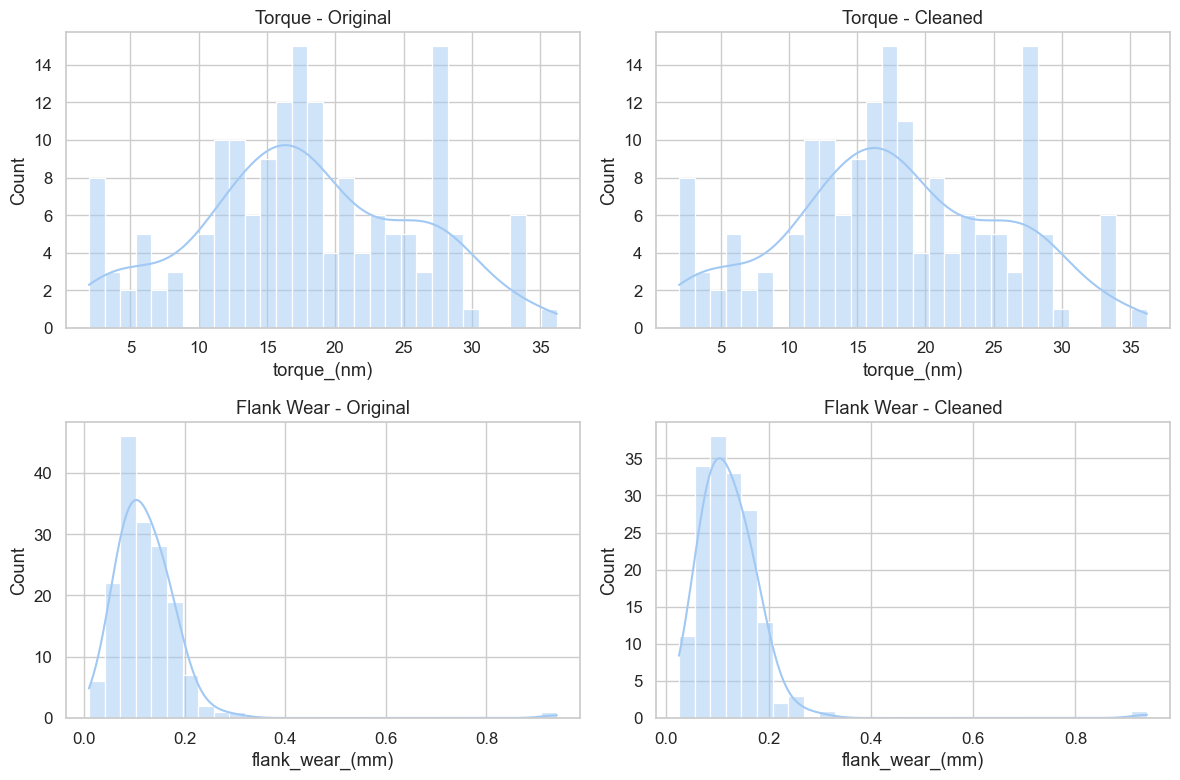

In [140]:
# Visualize distributions before and after cleaning
df_orig = load_data()
df_orig.columns = df_orig.columns.str.strip().str.lower().str.replace(' ', '_')

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df_orig['torque_(nm)'], bins=30, ax=axs[0,0], kde=True)
axs[0,0].set_title("Torque - Original")

sns.histplot(df_clean['torque_(nm)'], bins=30, ax=axs[0,1], kde=True)
axs[0,1].set_title("Torque - Cleaned")

sns.histplot(df_orig['flank_wear_(mm)'], bins=30, ax=axs[1,0], kde=True)
axs[1,0].set_title("Flank Wear - Original")

sns.histplot(df_clean['flank_wear_(mm)'], bins=30, ax=axs[1,1], kde=True)
axs[1,1].set_title("Flank Wear - Cleaned")

plt.tight_layout()
plt.show()

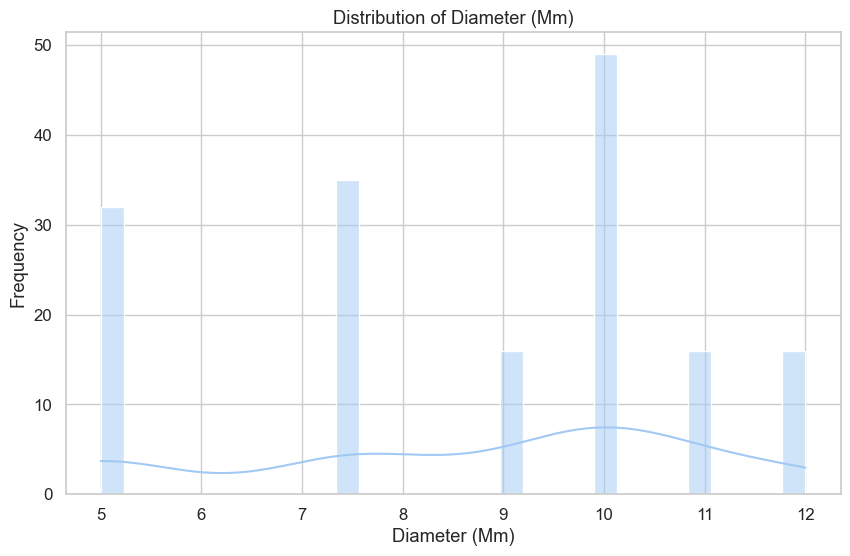

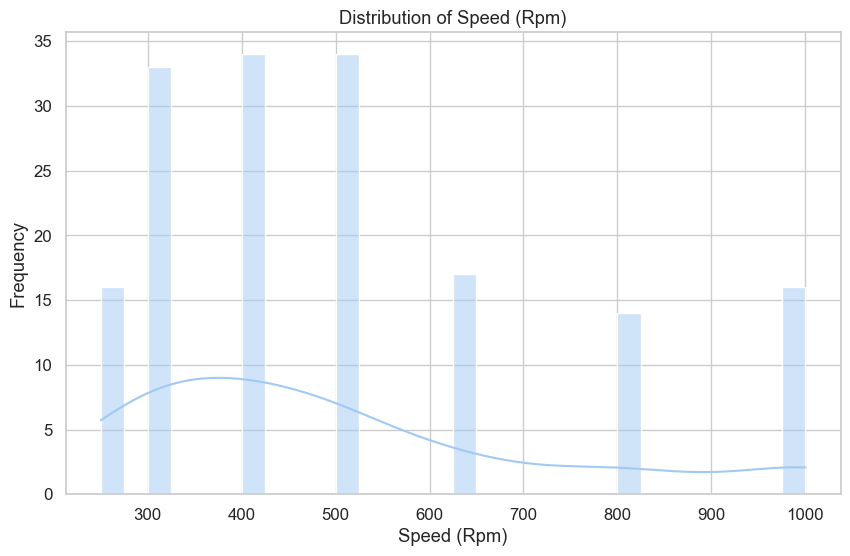

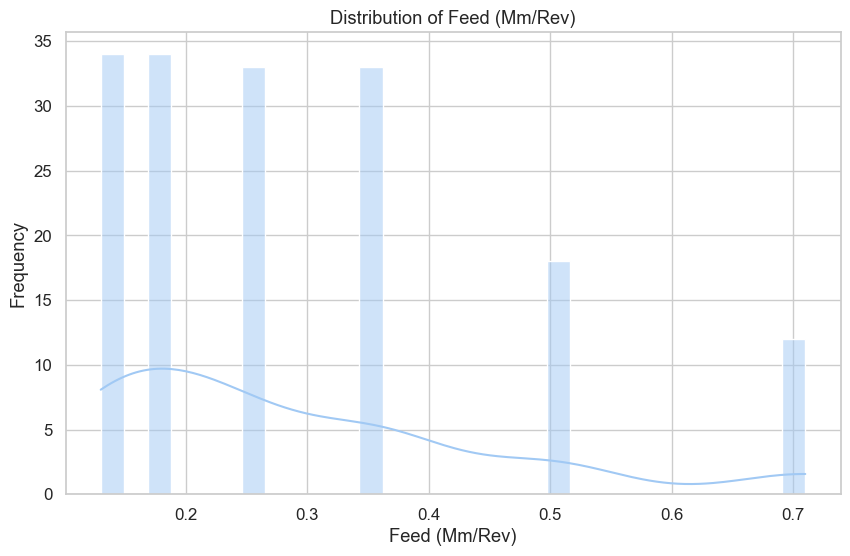

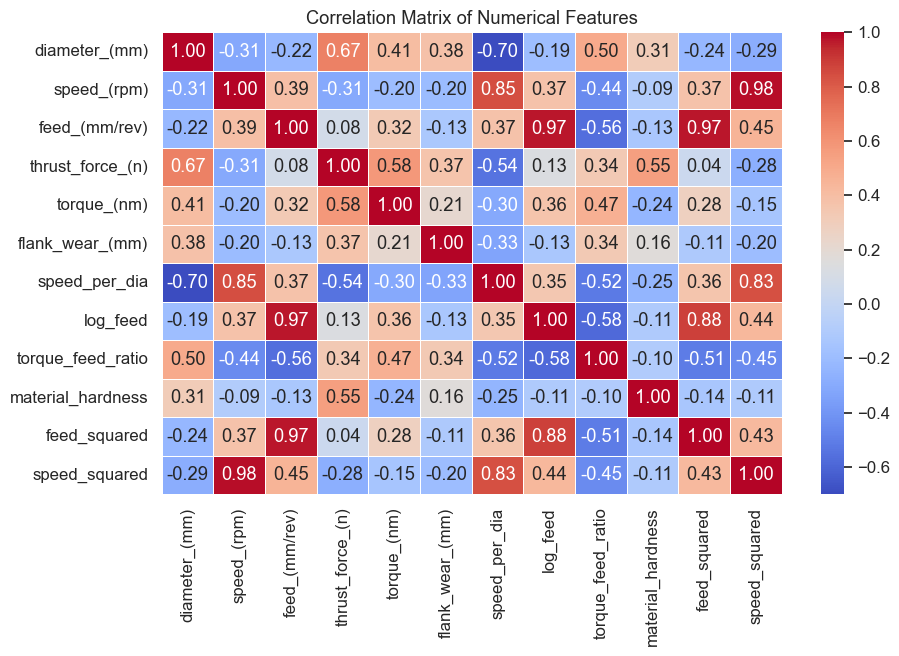

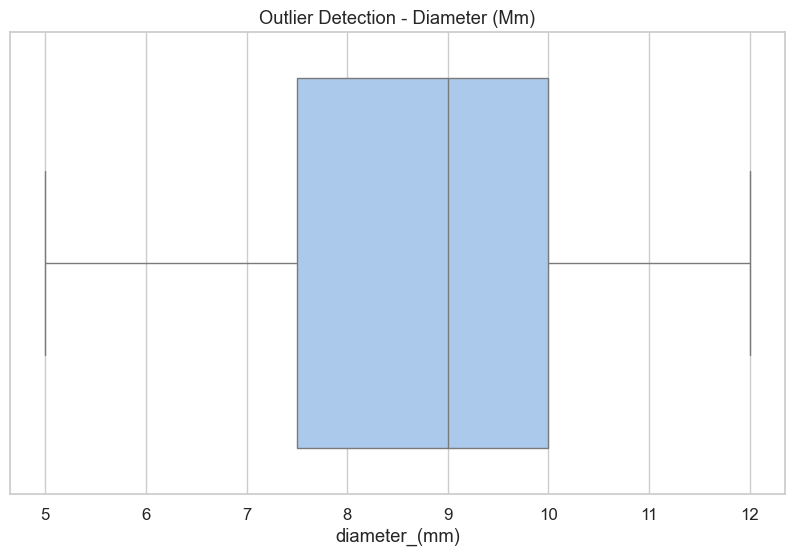

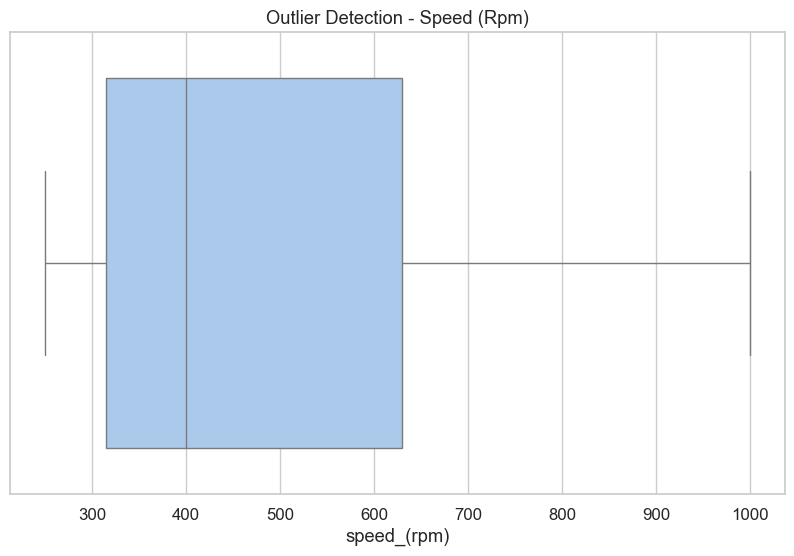

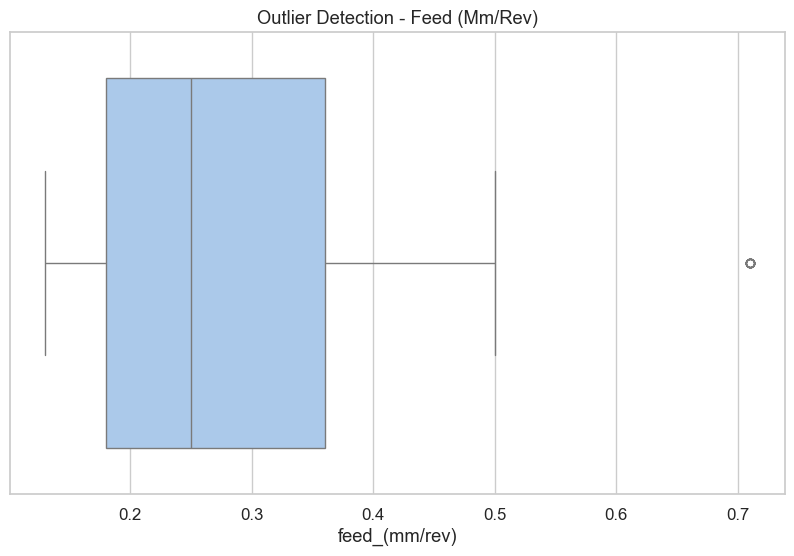

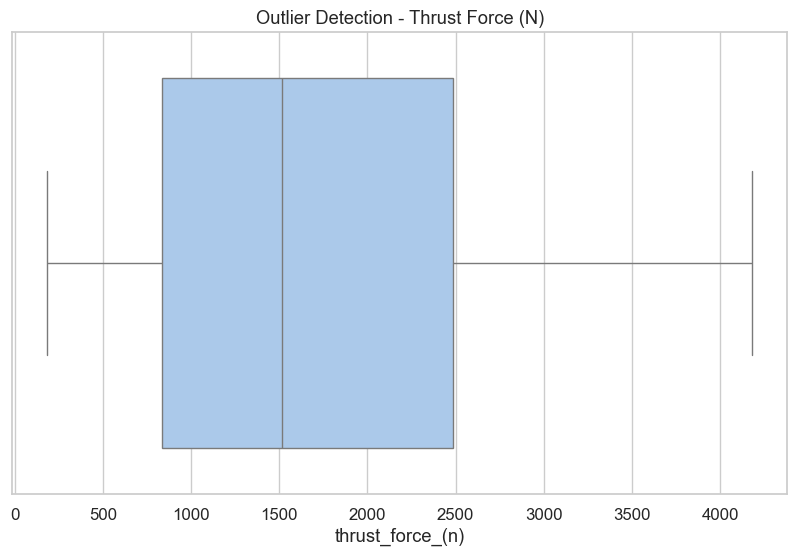

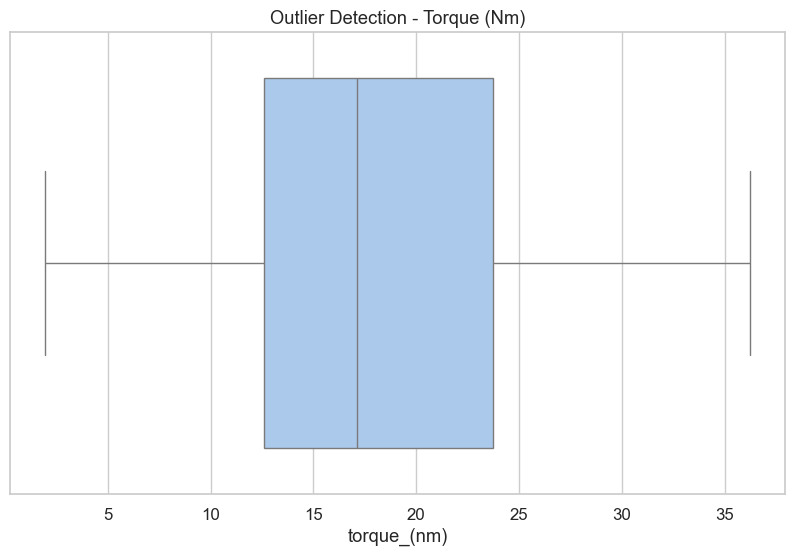

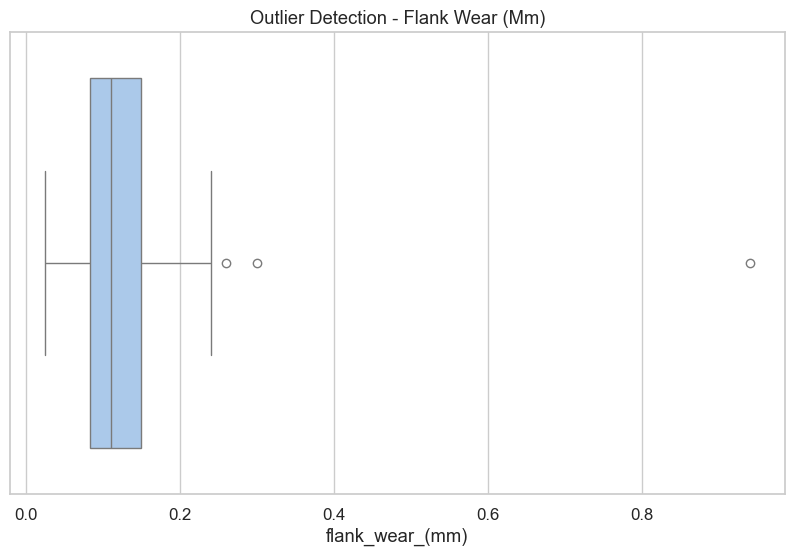

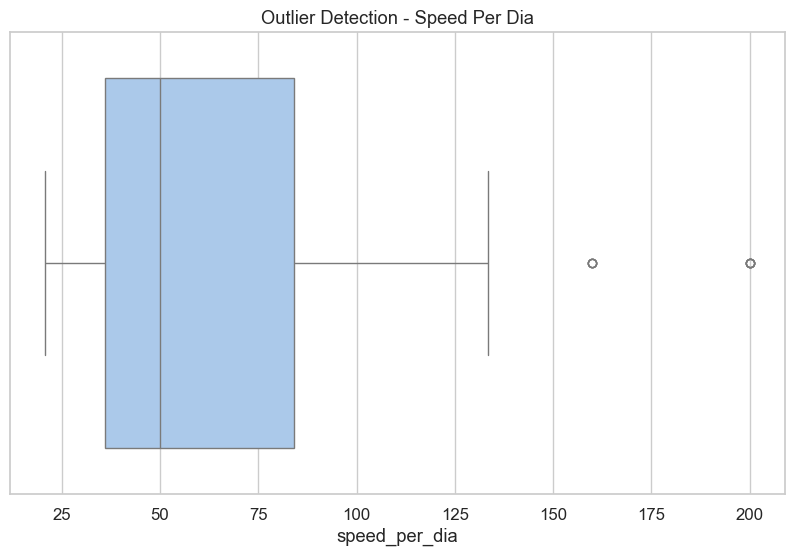

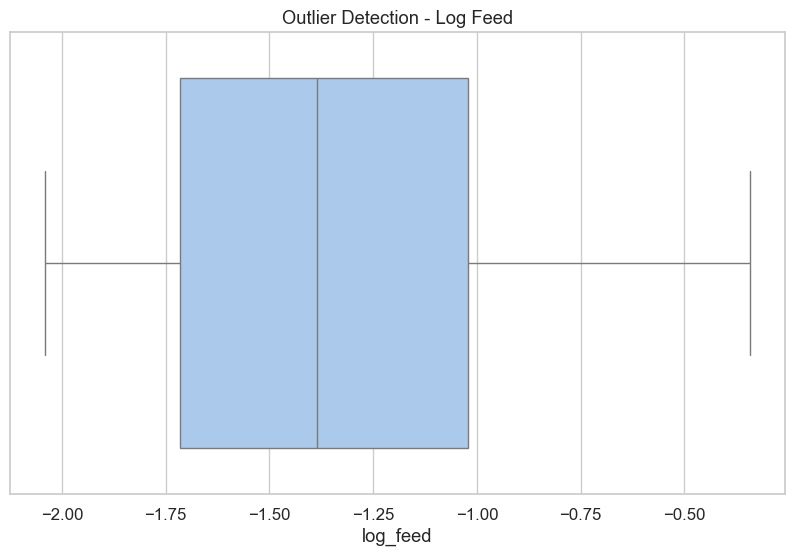

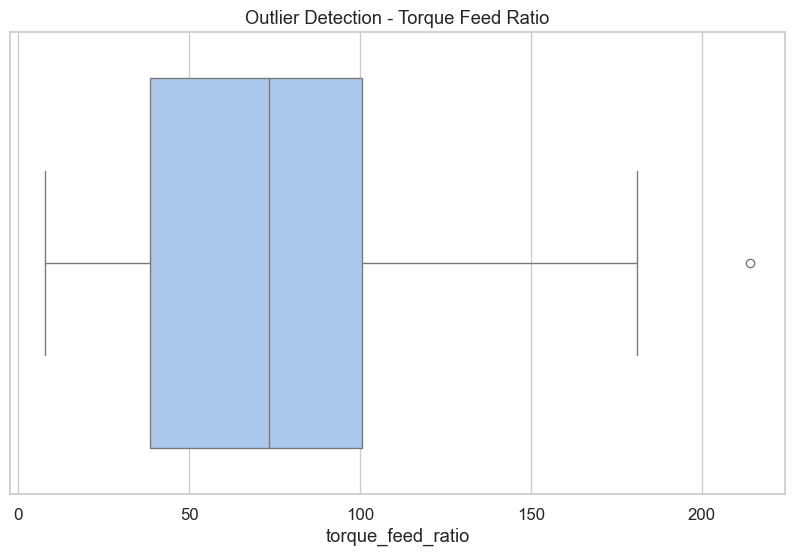

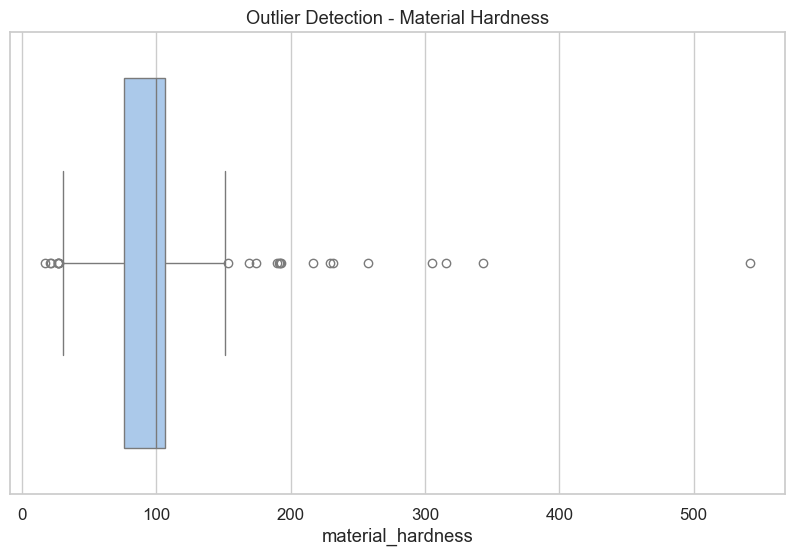

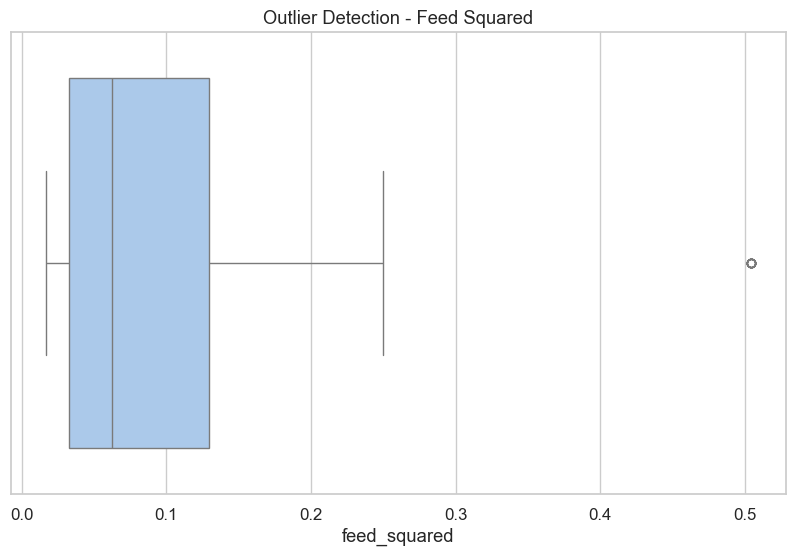

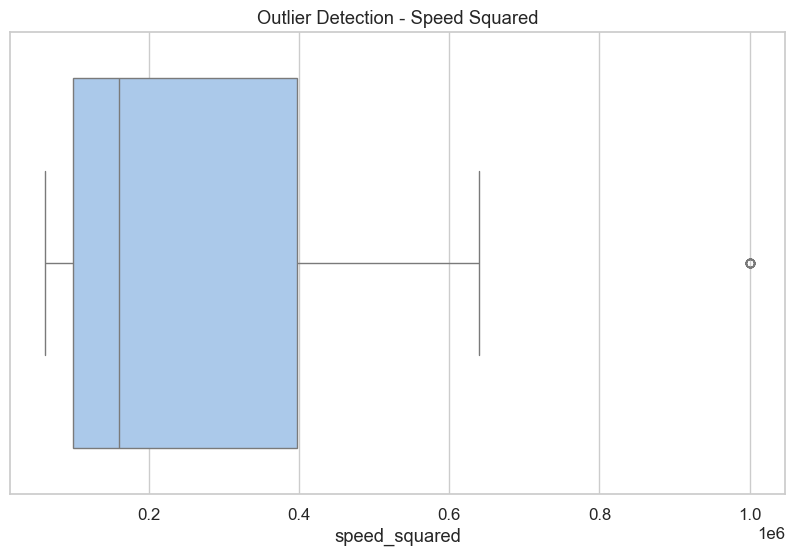

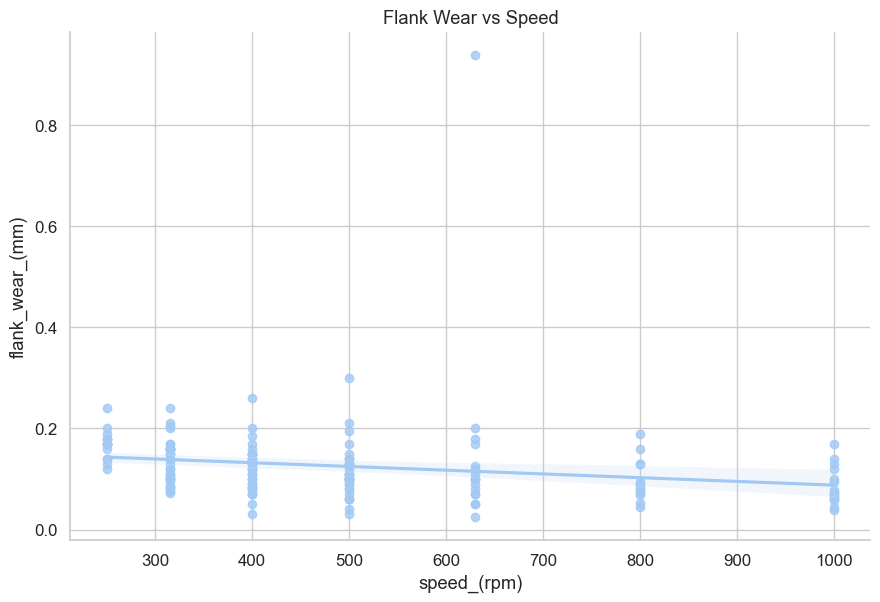

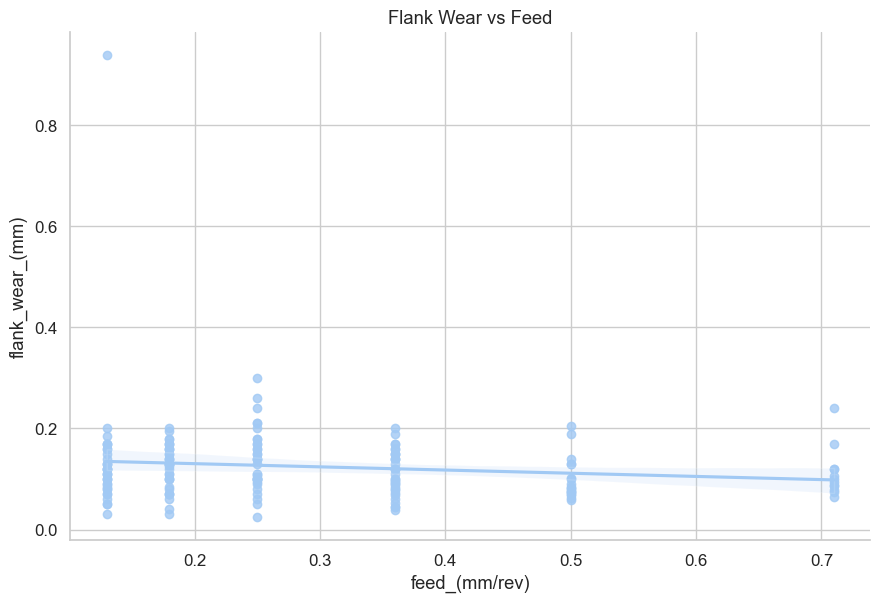

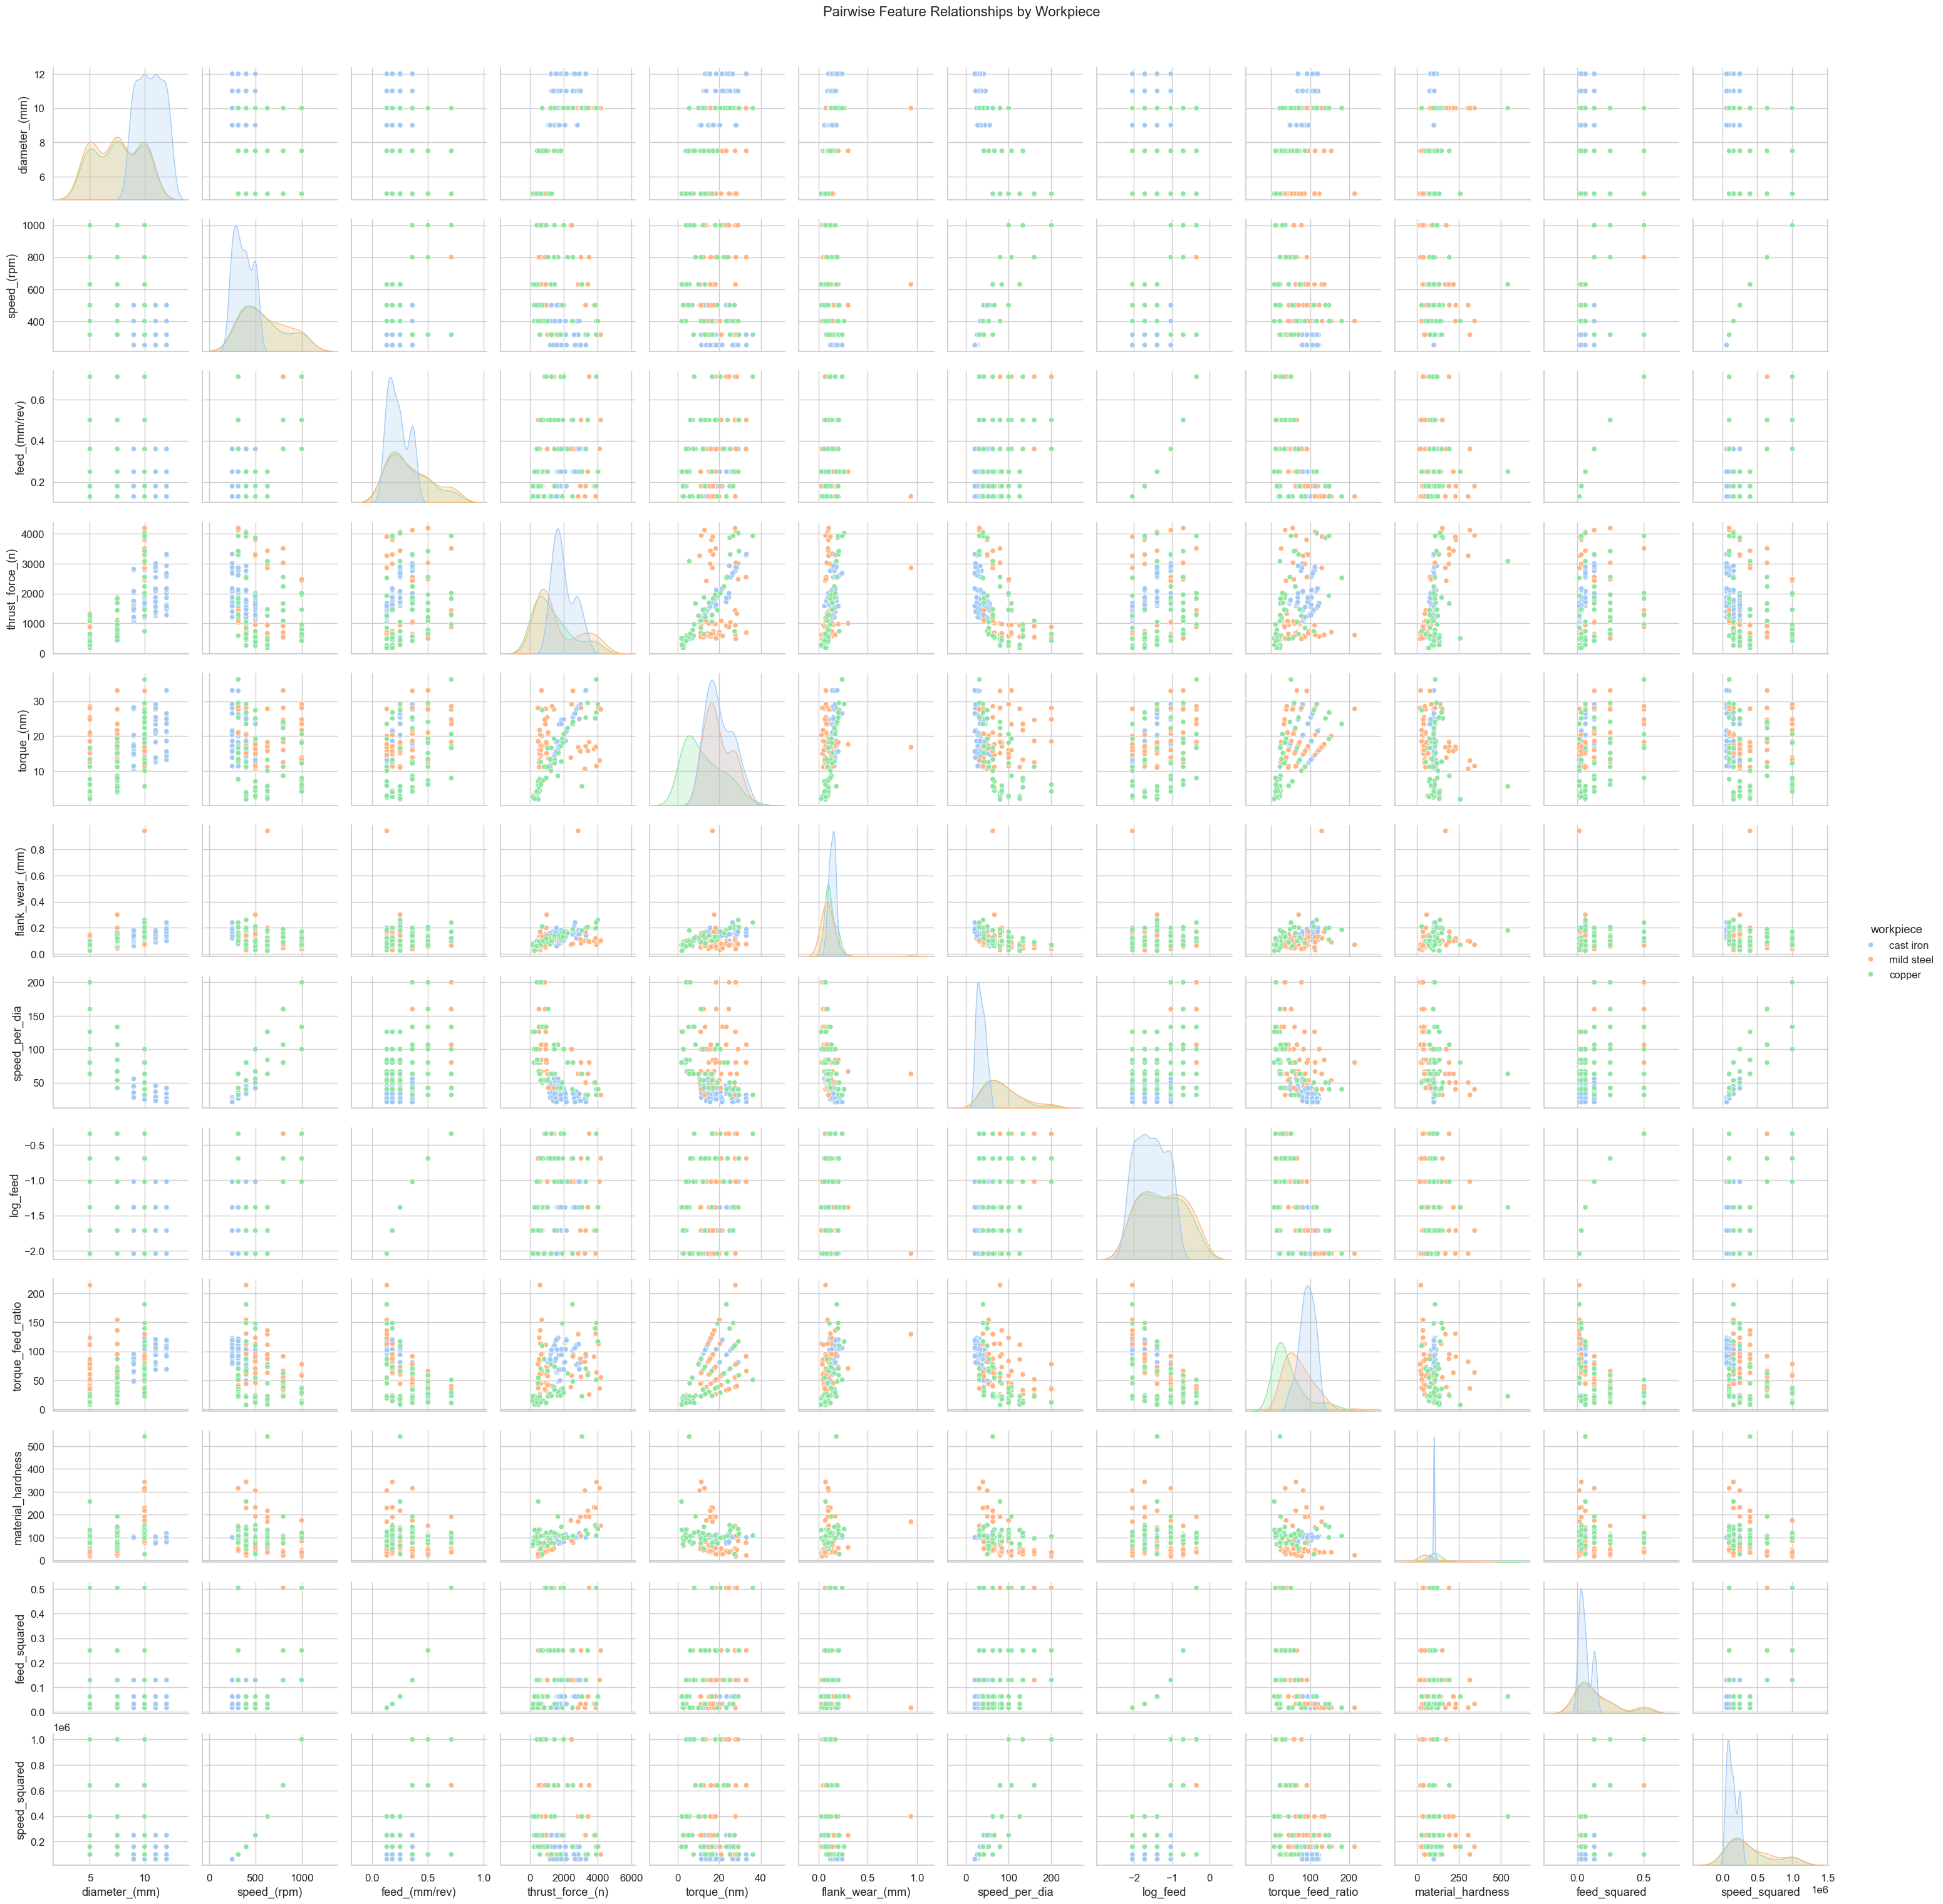

In [141]:
# General visualizations
from src.visualise_data import visualize
visualize(df_clean)

In [145]:
# Model tuning
from src.tune_models import tune_random_forest
best_rf, best_params, cv_results = tune_random_forest(X, y)
print("Best Params:", best_params)

import pandas as pd
cv_df = pd.DataFrame(cv_results)
cv_df = cv_df.sort_values(by='mean_test_score', ascending=False)
cv_df[['params', 'mean_test_score', 'rank_test_score']].head()

Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}


,params,mean_test_score,rank_test_score
6,"{'max_depth': None, 'max_features': 'sqrt', 'm...",-0.468557,1
51,"{'max_depth': 20, 'max_features': 'log2', 'min...",-0.468557,1
69,"{'max_depth': 30, 'max_features': 'log2', 'min...",-0.468557,1
60,"{'max_depth': 30, 'max_features': 'sqrt', 'min...",-0.468557,1
42,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",-0.468557,1


In [147]:
# Model training and evaluation
from src.model_train import train_models
results = train_models(X, y)

In [150]:
# Model training and evaluation
from src.model_train import train_models

results = train_models(X, y)

# Extract test set and predictions
X_test = results['X_test']
y_test = results['y_test']
models = results['models']
metrics = results['metrics']


🔍 Plotting for: RandomForest


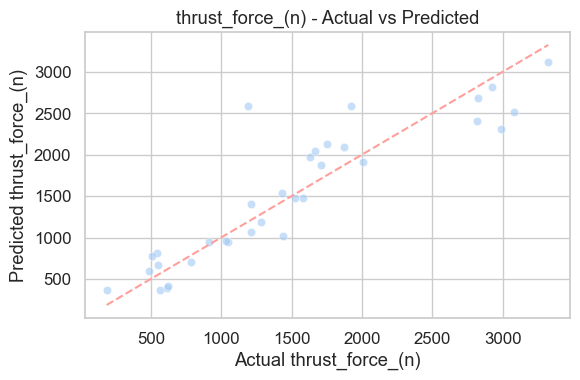

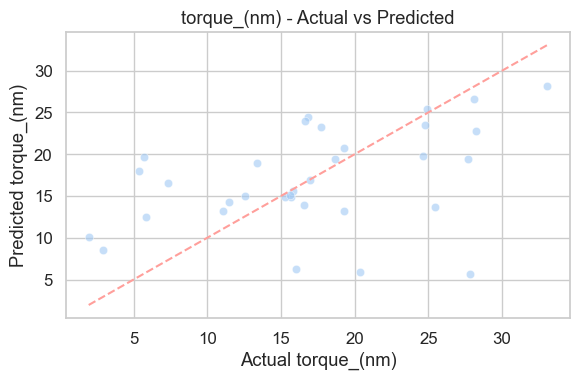

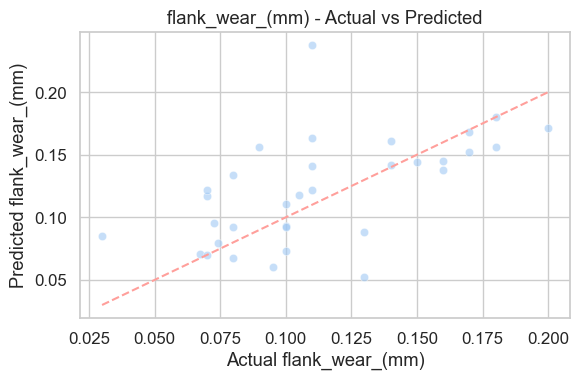

🔍 Plotting for: XGBoost


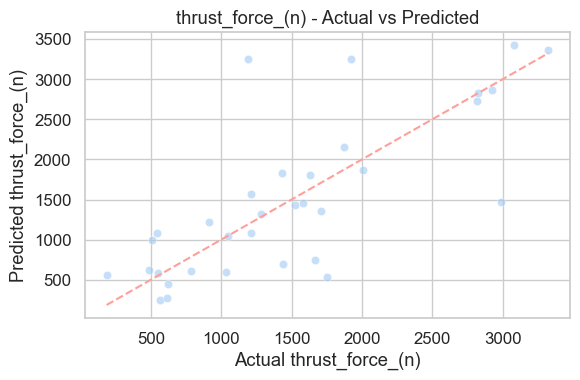

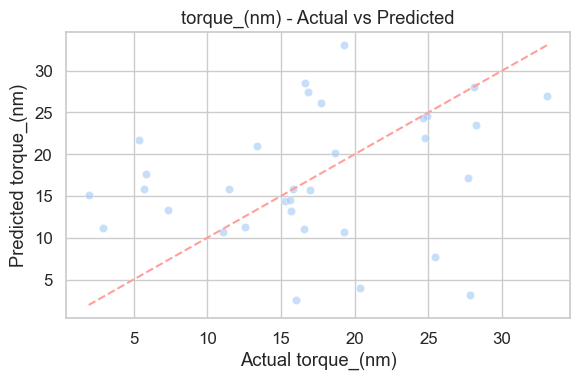

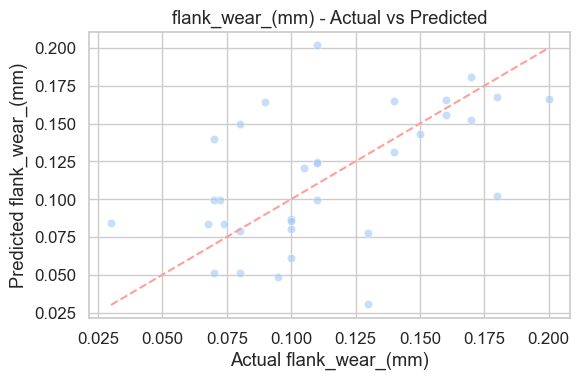

🔍 Plotting for: Ensemble


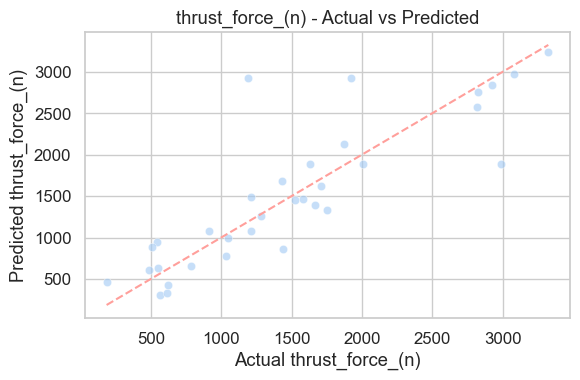

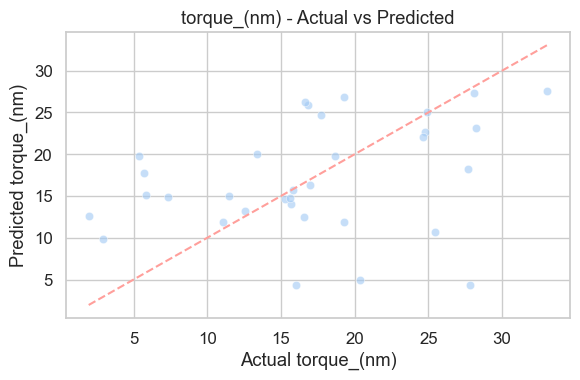

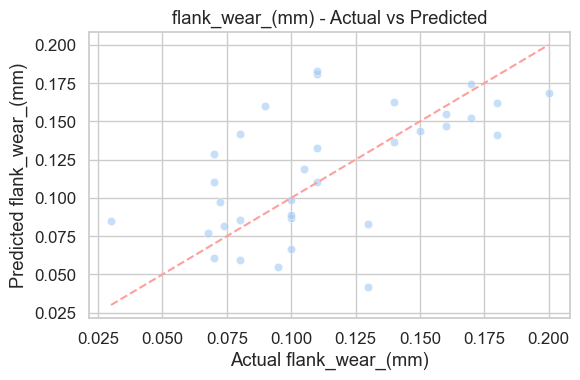

In [151]:
from src.evaluate_models import plot_predictions

for model_name in models:
    print(f"🔍 Plotting for: {model_name}")
    y_pred = models[model_name].predict(X_test)
    plot_predictions(y_test.values, y_pred, y.columns)


In [152]:
for model_name, model_metrics in metrics.items():
    print(f"\n📌 {model_name} Metrics:")
    for metric_name, metric_values in model_metrics.items():
        print(f"{metric_name}:")
        for target, value in zip(y.columns, metric_values):
            print(f"  {target}: {value:.4f}")
    print("-" * 40)


📌 RandomForest Metrics:
R2:
  thrust_force_(n): 0.8109
  torque_(nm): 0.0641
  flank_wear_(mm): 0.0753
MAE:
  thrust_force_(n): 263.8777
  torque_(nm): 5.6791
  flank_wear_(mm): 0.0276
MSE:
  thrust_force_(n): 136584.0944
  torque_(nm): 57.5235
  flank_wear_(mm): 0.0015
----------------------------------------

📌 XGBoost Metrics:
R2:
  thrust_force_(n): 0.4451
  torque_(nm): -0.5028
  flank_wear_(mm): -0.0516
MAE:
  thrust_force_(n): 416.7785
  torque_(nm): 7.3489
  flank_wear_(mm): 0.0313
MSE:
  thrust_force_(n): 400802.1875
  torque_(nm): 92.3738
  flank_wear_(mm): 0.0017
----------------------------------------

📌 Ensemble Metrics:
R2:
  thrust_force_(n): 0.7097
  torque_(nm): -0.1664
  flank_wear_(mm): 0.1348
MAE:
  thrust_force_(n): 299.8725
  torque_(nm): 6.4523
  flank_wear_(mm): 0.0285
MSE:
  thrust_force_(n): 209665.4441
  torque_(nm): 71.6921
  flank_wear_(mm): 0.0014
----------------------------------------
